In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = df.drop(["RowNumber","CustomerId"], axis=1)
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.shape

(10000, 12)

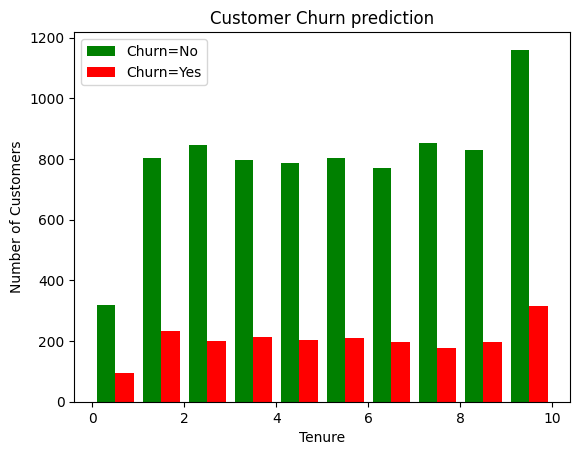

In [ ]:
Not_left = df[df.Exited == 0].Tenure
Left = df[df.Exited == 1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn prediction")

plt.hist([Not_left, Left], color = ['green','red'], label = ["Churn=No", "Churn=Yes"])
plt.legend()

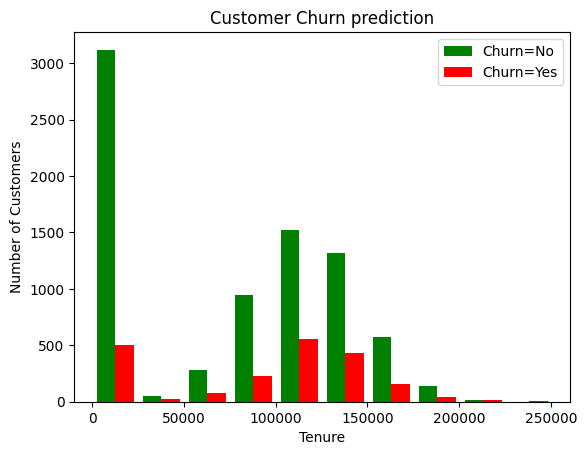

In [ ]:
Not_left = df[df.Exited == 0].Balance
Left = df[df.Exited == 1].Balance

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn prediction")

plt.hist([Not_left, Left], color = ['green','red'], label = ["Churn=No", "Churn=Yes"])
plt.legend()

In [ ]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

Surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ["Surname", "Geography", "Gender"]

label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.dtypes

Surname              int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
cols_to_scale = ['Surname','CreditScore','Geography','Gender','Age','Tenure','HasCrCard','Balance','IsActiveMember','NumOfProducts','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.380416,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1
1,0.401569,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0
2,0.696008,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1
3,0.098601,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0
4,0.621631,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.682020,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0
9996,0.455817,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0
9997,0.535653,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1
9998,0.800068,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1


In [ ]:
x = df.drop('Exited',axis = 1)
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
x_test.shape

(2000, 11)

In [ ]:
x_train[:10]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3163,0.148755,0.598,0.5,0.0,0.256757,0.8,0.457306,0.000000,1.0,1.0,0.533272
7345,0.661208,0.738,0.0,1.0,0.418919,0.5,0.422156,0.000000,1.0,1.0,0.081183
3153,0.429205,0.704,0.0,0.0,0.148649,0.6,0.594737,0.000000,1.0,1.0,0.048112
4044,0.721938,0.616,0.0,1.0,0.189189,0.8,0.000000,0.000000,1.0,1.0,0.402034
9456,0.202320,0.578,0.0,1.0,0.283784,0.6,0.600068,0.000000,1.0,0.0,0.152027
513,0.443876,0.768,0.0,1.0,0.216216,0.6,0.532481,0.000000,1.0,1.0,0.065485
2474,0.823951,0.778,0.0,0.0,0.256757,0.8,0.000000,0.333333,1.0,0.0,0.957819
7979,0.769021,0.410,0.0,0.0,0.108108,0.7,0.000000,0.333333,1.0,0.0,0.465599
3610,0.297168,0.460,0.0,0.0,0.513514,0.1,0.523592,0.000000,1.0,0.0,0.534587
9774,0.907540,0.658,0.0,1.0,0.324324,0.1,0.000000,0.333333,0.0,0.0,0.359092


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([

    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
                metrics = ['accuracy'])



In [ ]:
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7704
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.7983
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.8096
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.8165
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8195
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8227
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8251
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4064 - accuracy: 0.8294
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8322
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3902 - accuracy: 0.8397

In [ ]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 768us/step - loss: 0.3636 - accuracy: 0.8465


[0.3636230230331421, 0.8464999794960022]

In [ ]:
y_pred = model.predict(x_test)

63/63 [==============================] - 0s 869us/step


In [ ]:
print(y_pred)

[[0.05357672]
 [0.71513414]
 [0.03549728]
 ...
 [0.03595426]
 [0.02581733]
 [0.28027964]]


In [ ]:
y_pred1 = []
for i in y_pred:
  if i > 0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)


In [ ]:
print(y_pred1)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1580
           1       0.73      0.43      0.54       420

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.8465

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([

    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'RMSprop',
               loss = 'binary_crossentropy',
                metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
250/250 [==============================] - 3s 3ms/step - loss: 0.5039 - accuracy: 0.7939
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4716 - accuracy: 0.7976
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4560 - accuracy: 0.8037
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8083
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8129
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8149
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8180
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8205
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.8249
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8276

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

63/63 [==============================] - 1s 4ms/step
[[0.01283385]
 [0.14346817]
 [0.04513054]
 ...
 [0.24944577]
 [0.06983493]
 [0.17247994]]


In [ ]:
y_pred1 = []
for i in y_pred:
  if i < 0.1:
    y_pred1.append(0)
  else:
    y_pred1.append(1)

In [ ]:
print(y_pred1)

[0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76      1585
           1       0.38      0.84      0.52       415

    accuracy                           0.68      2000
   macro avg       0.66      0.74      0.64      2000
weighted avg       0.82      0.68      0.71      2000

